# Cleaning Data

So you've just got a brand new dataset and are itching to start exploring it. But where do you begin, and how can you be sure your dataset is clean? This chapter will introduce you to the world of data cleaning in Python! You'll learn how to explore your data with an eye for diagnosing issues such as outliers, missing values, and duplicate rows.

Diagnose Data for Cleaning data.  

- Prepare data for Analysis
- Data never comes clean
- diagnose problems

Common Problems
- columns names inconsistent
- Missing Data (NaN)
- Outliers need investigation
- duplicate rows need to be found and dropped
- untidy data sets, prevents transoforms for analysis vs. reporting
- processing columns
- Column Types can signal unexpected data values




In [12]:
# import airquality.csv file from data folder as pandas dataframe

import pandas as pd

df = pd.read_csv('./data/airquality.csv')

## Visually Inspecting Data

- *Object* type is generic and stored as string
- *Float* type is numeric with decimels
- *int* type is numeric with no decimels

Strings in Numeric columns may be reasons why column dtypes are listed as Objects.  example, the word 'missing' is listed in the column of numeric values


#### Loading and viewing your data

In this chapter, you're going to look at a subset of the Department of Buildings Job Application Filings dataset from the NYC Open Data portal. This dataset consists of job applications filed on January 22, 2017.

Your first task is to load this dataset into a DataFrame and then inspect it using the .head() and .tail() methods. However, you'll find out very quickly that the printed results don't allow you to see everything you need, since there are too many columns. Therefore, you need to look at the data in another way.

The .shape and .columns attributes let you see the shape of the DataFrame and obtain a list of its columns. From here, you can see which columns are relevant to the questions you'd like to ask of the data. To this end, a new DataFrame, df_subset, consisting only of these relevant columns, has been pre-loaded. This is the DataFrame you'll work with in the rest of the chapter.

Get acquainted with the dataset now by exploring it with pandas! This initial exploratory analysis is a crucial first step of data cleaning.

In [11]:
# returns first 10 records

df.head(10)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [10]:
# returns last 5 records

df.tail(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29
152,20.0,223.0,11.5,68,9,30


In [9]:
# returns index of column names

df.columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [13]:
# number of rows and columns of data

df.shape

(153, 6)

In [16]:
# get additional info on the dataframe, using info() method
# notice there 153 entries, and Ozone has 116 non-null entries
# ther are 37 missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      116 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB


###  Example

Great work! In addition to the suspicious number of 0 values, which may represent missing data, notice that the columns that contain monetary values - 'Initial Cost' and 'Total Est. Fee' - have a dollar sign in the beginning. These columns may be coded as strings instead of numeric values. You will check this in the next exercise.



In [17]:
# example

# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('./data/dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())


       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

/Users/naidaire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


NameError: name 'df_subset' is not defined

In [18]:
print(df.head())

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

# Exploratory Data Analysis

EDA to help identify data that needs investigation

- info() Method
- Frequency Counts

#### Frequency counts for categorical data

As you've seen, .describe() can only be used on numeric columns. So how can you diagnose data issues when you have categorical data? One way is by using the .value_counts() method, which returns the frequency counts for each unique value in a column!

This method also has an optional parameter called dropna which is True by default. What this means is if you have missing data in a column, it will not give a frequency count of them. You want to set the dropna column to False so if there are missing values in a column, it will give you the frequency counts.

In this exercise, you're going to look at the 'Borough', 'State', and 'Site Fill' columns to make sure all the values in there are valid. When looking at the output, do a sanity check: Are all values in the 'State' column from NY, for example? Since the dataset consists of applications filed in NY, you would expect this to be the case.


In [23]:
# Frequency Count, using the Value_Counts Method
# Dropna=False will count missing values

df.Borough.value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [24]:
# Same using Bracket Notation

df['Borough'].value_counts(dropna=False)

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

In [27]:
# Chaining Methods

df.Borough.value_counts(dropna=False).head()

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64

#### Summary Statistics

- use on Numeric Columns
- Outliers that are considerably higher or lower
- use Describe() method
    - only columns of numeric values will be returned

In [28]:
df.describe()

,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


In [29]:
# Read the file into a DataFrame: df
df = pd.read_csv('./data/dob_job_application_filings_subset.csv')

# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))


MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
MD        7
DC        7
GA        6
KS        6
MA        6
VA        5
CO        4
MN        3
SC        3
WI        3
AZ        3
NC        2
UT        2
RI        2
WA        1
IN        1
VT        1
MI        1
NM        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


/Users/naidaire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Visualizing Data

- great way to spot outliers
- more than just looking for patterns
- great for outliers and cleaning data pipeline
- 

### Bar Plots and Histogram
- Bar Plots for descrete data (categories)
- Histogram for continuous data (infinite number of values)
- Box Plots - visuzlize basic summary statistics
    - Min, Max, Outliers, 25, 50th, 75th percentile

### Identifying Errors
- Use Bar and Histogram plots
- Not all outliers are bad data points
- some can be an error, but others are valid


In [30]:
df.describe()


,Job #,Doc #,Block,Lot,Bin #,Cluster,PC Filed,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Owner Type,Zip,Owner'sPhone #
count,1.284600e+04,12846.000000,12846.000000,12846.000000,1.284600e+04,0.0,0.0,1.284600e+04,1.284600e+04,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,12846.000000,0.0,1.284600e+04,1.284600e+04
mean,2.426788e+08,1.162930,2703.834735,623.303441,2.314997e+06,NaN,NaN,1.439973e+03,2.007286e+03,46.101432,3.069360,8.062354,8.144325,94.022809,94.917562,NaN,1.210268e+06,5.025739e+09
std,1.312507e+08,0.514937,3143.002812,2000.934794,1.399062e+06,NaN,NaN,3.860757e+04,4.081570e+04,784.216569,37.246034,11.874080,11.843492,146.917360,146.580666,NaN,1.343588e+07,2.738212e+09
min,1.036438e+08,1.000000,1.000000,0.000000,1.000003e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,8.300000e+02,0.000000e+00
25%,1.216206e+08,1.000000,836.000000,12.000000,1.035728e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,21.000000,NaN,1.001900e+04,2.126841e+09
50%,2.202645e+08,1.000000,1411.500000,32.000000,2.004234e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,4.000000,4.000000,45.000000,45.000000,NaN,1.031000e+04,5.169379e+09
75%,3.208652e+08,1.000000,3355.000000,59.000000,3.343823e+06,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,9.000000,9.000000,105.000000,107.000000,NaN,1.122100e+04,7.186809e+09
max,5.400246e+08,9.000000,99999.000000,9078.000000,5.864852e+06,NaN,NaN,2.873107e+06,2.873107e+06,50384.000000,3160.000000,102.000000,102.000000,4200.000000,4200.000000,NaN,6.063135e+08,9.787266e+09


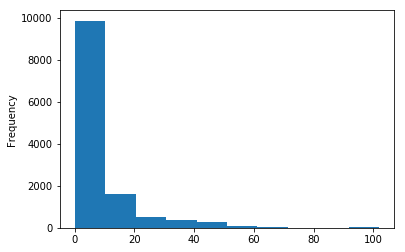

In [33]:
import matplotlib.pyplot as plt

df['ExistingNo. of Stories'].plot('hist')

plt.show()

In [41]:
# Slice Data to only view specific values to identify the errors

df[df['ExistingNo. of Stories']>100]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #,Job Description,DOBRunDate
5,121589753,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,Q,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,GENERAL CONSTRUCTION CHANGES TAKING PLACE ON T...,04/26/2013 12:00:00 AM
1598,121601052,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,B,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,MODIFICATIONS TO EXISTING MODIFIED CLASS E SYS...,05/02/2013 12:00:00 AM
1916,121601043,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,P,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,GENERAL CONSTRUCTION WORK TAKING PLACE IN THE ...,05/02/2013 12:00:00 AM
1973,121599895,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,D,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,SPRINKLER WORK TAKING PLACE IN THE CELLAR AS P...,05/02/2013 12:00:00 AM
2204,121605129,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,J,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,GENERAL MECHANICAL CHANGES TAKING PLACE ON THE...,05/04/2013 12:00:00 AM
3726,121590402,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,A,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,EXISTING FIRE ALARM CLASS E ALTERATION AND UPG...,05/09/2013 12:00:00 AM
4130,121614725,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,R,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,INSTALLATION OF 3 NEW ANTENNA MOUNTS ON 81ST F...,05/10/2013 12:00:00 AM
5082,121611835,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,Q,...,SILVESTRI,"EMPIRE STATE BUILDING CO., LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,GENERAL CONSTRUCTION CHANGES TAKING PLACE ON T...,05/15/2013 12:00:00 AM
5977,121611826,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,D,...,CLANCY,"EMPIRE STATE BUILDING CO, LLC",350,FIFTH AVENUE,NEW YORK,NY,10001,2127363100,SPRINKLER MODIFICATIONS TAKING PLACE ON THE 67...,05/17/2013 12:00:00 AM
6039,121611817,1,MANHATTAN,350,FIFTH AVENUE,835,41,1015862,A2,Q,...,CLANCY,"EMPIRE STATE BUILDING CO, LLC",350,FIFTH AVENUE,NEW YORK,NY,10118,2127363100,CONSTRUCTION MODIFICATIONS TAKING PLACE ON THE...,05/17/2013 12:00:00 AM


In [51]:
# Slicing using LOC

df.loc[df['ExistingNo. of Stories']>100, 'ExistingNo. of Stories']

5        102
1598     102
1916     102
1973     102
2204     102
3726     102
4130     102
5082     102
5977     102
6039     102
6043     102
6063     102
6124     102
6143     102
7370     102
7399     102
7465     102
7734     102
8689     102
8909     102
12252    102
12297    102
Name: ExistingNo. of Stories, dtype: int64

#### Boxplot 

- Whiskers show the Min and Max, excluding Outliers
- Dots are outliers
- Most of the Data represented by the Box
- There may be bad data
- Or they they are valid data (China, India, vs Australia Examle)

/Users/naidaire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


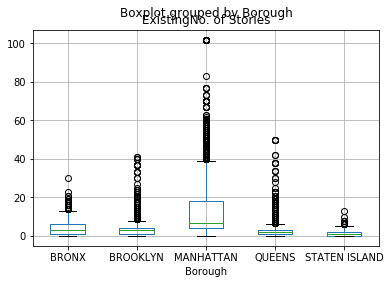

In [54]:
df.boxplot(column='ExistingNo. of Stories', by='Borough')

plt.show()

#### Scatterplots

- Show relationship between 2 numeric values
- Use to Flag potentially bad data
- Errors not found by looking at only 1 variable

#### Visualizing single variables with histograms

Up until now, you've been looking at descriptive statistics of your data. One of the best ways to confirm what the numbers are telling you is to plot and visualize the data.

You'll start by visualizing single variables using a histogram for numeric values. The column you will work on in this exercise is 'Existing Zoning Sqft'.

The .plot() method allows you to create a plot of each column of a DataFrame. The kind parameter allows you to specify the type of plot to use - kind='hist', for example, plots a histogram.

In the IPython Shell, begin by computing summary statistics for the 'Existing Zoning Sqft' column using the .describe() method. You'll notice that there are extremely large differences between the min and max values, and the plot will need to be adjusted accordingly. In such cases, it's good to look at the plot on a log scale. The keyword arguments logx=True or logy=True can be passed in to .plot() depending on which axis you want to rescale.

Finally, note that Python will render a plot such that the axis will hold all the information. That is, if you end up with large amounts of whitespace in your plot, it indicates counts or values too small to render.

In [59]:
# Read the file into a DataFrame: df
df = pd.read_csv('./data/dob_job_application_filings_subset.csv')



/Users/naidaire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Describe the column
df['Existing Zoning Sqft'].describe()




count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64

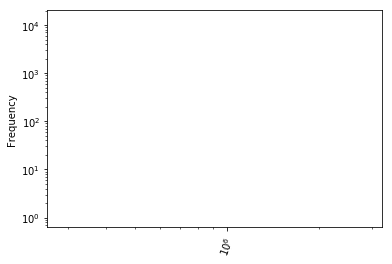

In [61]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

Excellent work! While visualizing your data is a great way to understand it, keep in mind that no one technique is better than another. As you saw here, you still needed to look at the summary statistics to help understand your data better. You expected a large amount of counts on the left side of the plot because the 25th, 50th, and 75th percentiles have a value of 0. The plot shows us that there are barely any counts near the max value, signifying an outlier.

#### Visualizing multiple variables with boxplots

Histograms are great ways of visualizing single variables. To visualize multiple variables, boxplots are useful, especially when one of the variables is categorical.

In this exercise, your job is to use a boxplot to compare the 'initial_cost' across the different values of the 'Borough' column. The pandas .boxplot() method is a quick way to do this, in which you have to specify the column and by parameters. Here, you want to visualize how 'initial_cost' varies by 'Borough'.

pandas and matplotlib.pyplot have been imported for you as pd and plt, respectively, and the DataFrame has been pre-loaded as df

In [3]:
df = pd.read_csv('./data/dob_job_application_filings_subset.csv')



/Users/naidaire/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='Initial Cost', by='Borough', rot=90)

# Display the plot
plt.show()

/Users/naidaire/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

#### Visualizing multiple variables with scatter plots

Boxplots are great when you have a numeric column that you want to compare across different categories. When you want to visualize two numeric columns, scatter plots are ideal.

In this exercise, your job is to make a scatter plot with 'initial_cost' on the x-axis and the 'total_est_fee' on the y-axis. You can do this by using the DataFrame .plot() method with kind='scatter'. You'll notice right away that there are 2 major outliers shown in the plots.

Since these outliers dominate the plot, an additional DataFrame, df_subset, has been provided, in which some of the extreme values have been removed. After making a scatter plot using this, you'll find some interesting patterns here that would not have been seen by looking at summary statistics or 1 variable plots.

When you're done, you can cycle between the two plots by clicking the 'Previous Plot' and 'Next Plot' buttons below the plot.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='Initial_Cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter',x='initial_cost', y='total_est_fee', rot=70)
plt.show()

KeyError: 'Initial_Cost'

Excellent work! In general, from the second plot it seems like there is a strong correlation between 'initial_cost' and 'total_est_fee'. In addition, take note of the large number of points that have an 'initial_cost' of 0. It is difficult to infer any trends from the first plot because it is dominated by the outliers.

